In [ ]:
from google.colab import files, drive
import os
from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from tensorflow.keras.models import *
import zipfile
from tensorflow import keras
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt

# **Connect to Kaggle API**

In [ ]:
#upload kaggle json

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"muhammadzidana","key":"f8e3dd095c56946bddfc336e9fce7d9d"}'}

In [ ]:
#create a kaggle folder
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#copy kaggle.json to folder created
!cp kaggle.json ~/.kaggle/

#permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d preatcher/standard-ocr-dataset

standard-ocr-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


# **Load Image**

In [ ]:
test_local_zip = '/content/standard-ocr-dataset.zip'
zip_ref = zipfile.ZipFile(test_local_zip, 'r')
zip_ref.extractall('/tmp/dataset')

zip_ref.close()

In [ ]:
os.listdir('/tmp/dataset')

['data2', 'data']

In [ ]:
source_dir = '/tmp/dataset/data'
os.listdir(source_dir)
     

['testing_data', 'training_data']

In [ ]:
training_data_dir = os.path.join(source_dir, 'training_data')
validation_data_dir = os.path.join(source_dir, 'testing_data')

In [ ]:
print('len of folders in training data dir: {}'.format(len(os.listdir(training_data_dir))))
print('len of folders in validation data dir: {}'.format(len(os.listdir(validation_data_dir))))

len of folders in training data dir: 36
len of folders in validation data dir: 36


In [ ]:
k = os.listdir(training_data_dir)[0]
k = os.path.join(training_data_dir, k)

In [ ]:
print(k)

/tmp/dataset/data/training_data/P


In [ ]:
k_img = []
for index in range (len(k)):
  img = cv2.imread(os.path.join(k, os.listdir(k)[index]))
  k_img.append(img)

In [ ]:
k_img[0].shape

(41, 28, 3)

# **Preprocessing Image**

In [ ]:
img_size = 128
input_shape = (128,128,1)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

training_generator = train_datagen.flow_from_directory(training_data_dir,
                                                 target_size = (img_size, img_size),
                                                 batch_size = 382,  # 20628 // 54 = 382
                                                 color_mode = 'grayscale',
                                                 class_mode = 'categorical',
    
)

validation_generator = validation_datagen.flow_from_directory(validation_data_dir,
                                                 target_size = (img_size, img_size),
                                                 batch_size = 36, #1008 // 28 = 36 
                                                 color_mode = 'grayscale',
                                                 class_mode = 'categorical',
    
)

Found 20628 images belonging to 36 classes.
Found 1008 images belonging to 36 classes.


In [ ]:
#create a model
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32,(5,5), activation ='relu', input_shape=input_shape), 
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.2),

      tf.keras.layers.Dense(256, activation = 'relu'),
      tf.keras.layers.Dense(36, activation='softmax'),



])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# **Train the model**

In [ ]:
history = model.fit(training_generator,
                            steps_per_epoch = 54,
                            epochs = 100,
                            validation_data = validation_generator,
                            validation_steps = 28,
                            verbose = 1)

Epoch 1/100
54/54 [==============================] - 52s 693ms/step - loss: 2.9654 - accuracy: 0.1830 - val_loss: 0.9881 - val_accuracy: 0.7192
Epoch 2/100
54/54 [==============================] - 39s 720ms/step - loss: 1.4541 - accuracy: 0.5664 - val_loss: 0.3968 - val_accuracy: 0.9107
Epoch 3/100
54/54 [==============================] - 38s 698ms/step - loss: 0.9721 - accuracy: 0.7113 - val_loss: 0.2806 - val_accuracy: 0.9226
Epoch 4/100
54/54 [==============================] - 38s 695ms/step - loss: 0.7597 - accuracy: 0.7778 - val_loss: 0.2173 - val_accuracy: 0.9335
Epoch 5/100
54/54 [==============================] - 38s 703ms/step - loss: 0.6371 - accuracy: 0.8123 - val_loss: 0.1446 - val_accuracy: 0.9573
Epoch 6/100
54/54 [==============================] - 38s 691ms/step - loss: 0.5480 - accuracy: 0.8400 - val_loss: 0.1320 - val_accuracy: 0.9563
Epoch 7/100
54/54 [==============================] - 38s 696ms/step - loss: 0.4872 - accuracy: 0.8565 - val_loss: 0.1223 - val_accuracy:

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ocr_model
model.save('/content/drive/My Drive/model/model-ocr-zidan-2.h5')

In [ ]:
!ls ocr_model

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/model/model-ocr-zidan-2.h5')

# **Predict**

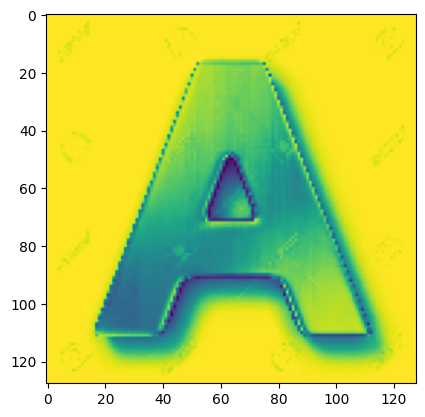

1/1 [==============================] - 0s 37ms/step

predict: A


In [ ]:
img = cv2.imread("/content/drive/My Drive/test/alphabet/a.png")
img = cv2.resize(img, (128,128))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
plt.show()

img = np.array(img, dtype = 'float32')
img = np.expand_dims(img, axis = 2)
img = img.reshape(-1, 128, 128, 1)
prediction = model.predict(img)
np.argmax(prediction)

labelNames = "0123456789"
labelNames += "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
print("\npredict: {}".format(labelNames[np.argmax(prediction)]))

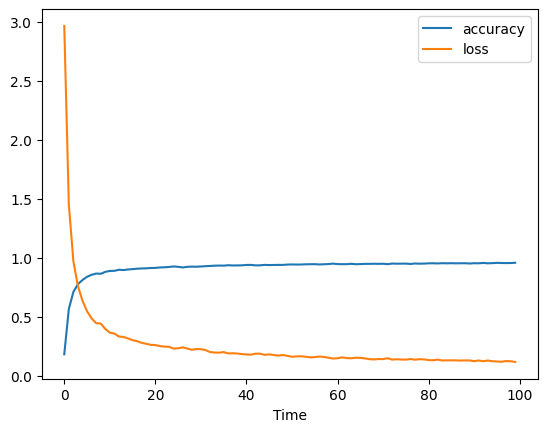

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()